# Resultados Decision Tree

**Author** Felipe U.

Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.style.use(['seaborn', "seaborn-dark"][0])
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

from time import time, gmtime, strftime
import pickle

# Datasets

In [2]:
def plot_dataset(X, y, name):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu");
    ax.set_title(f"{name} dataset");

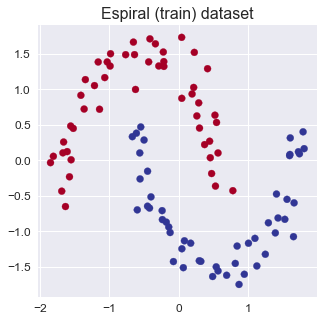

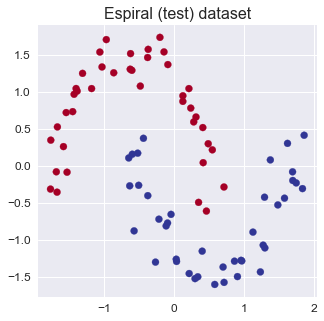

In [3]:
dataset_spiral_train = pickle.load(open("train_dataset_spiral.pickle", "rb"))
dataset_spiral_test = pickle.load(open("test_dataset_spiral.pickle", "rb"))
plot_dataset(dataset_spiral_train[0], dataset_spiral_train[1], "Espiral (train)")
plot_dataset(dataset_spiral_test[0], dataset_spiral_test[1], "Espiral (test)")

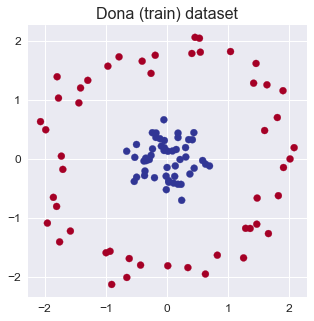

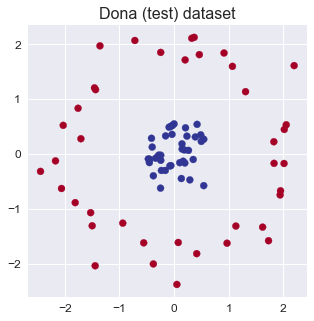

In [4]:
dataset_donut_train = pickle.load(open("train_dataset_donut.pickle", "rb"))
dataset_donut_test = pickle.load(open("test_dataset_donut.pickle", "rb"))
plot_dataset(dataset_donut_train[0], dataset_donut_train[1], "Dona (train)")
plot_dataset(dataset_donut_test[0], dataset_donut_test[1], "Dona (test)")

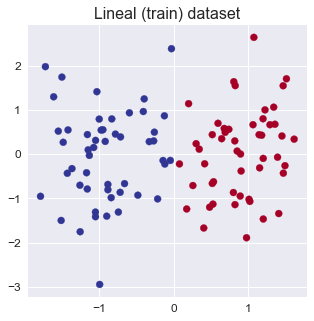

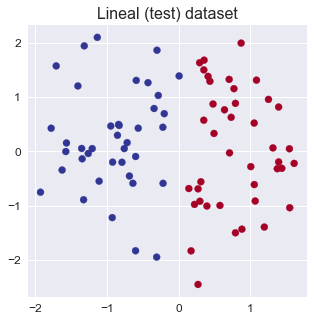

In [5]:
dataset_linear_train = pickle.load(open("train_dataset_linear.pickle", "rb"))
dataset_linear_test = pickle.load(open("test_dataset_linear.pickle", "rb"))
plot_dataset(dataset_linear_train[0], dataset_linear_train[1], "Lineal (train)")
plot_dataset(dataset_linear_test[0], dataset_linear_test[1], "Lineal (test)")

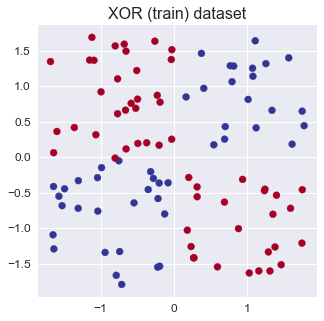

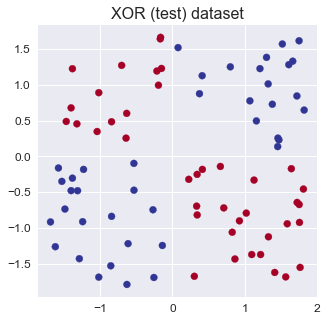

In [6]:
dataset_xor_train = pickle.load(open("train_dataset_xor.pickle", "rb"))
dataset_xor_test = pickle.load(open("test_dataset_xor.pickle", "rb"))
plot_dataset(dataset_xor_train[0], dataset_xor_train[1], "XOR (train)")
plot_dataset(dataset_xor_test[0], dataset_xor_test[1], "XOR (test)")

# Train

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
%%time
start = time()
dt_clf_spiral = DecisionTreeClassifier(random_state=0, max_depth=5)
dt_clf_spiral.fit(dataset_spiral_train[0], dataset_spiral_train[1])
end = time()
dt_spiral_time = end-start
dt_clf_spiral.score(dataset_spiral_test[0], dataset_spiral_test[1])

CPU times: total: 0 ns
Wall time: 1 ms


0.975

In [9]:
%%time
start = time()
dt_clf_donut = DecisionTreeClassifier(random_state=0, max_depth=4)
dt_clf_donut.fit(dataset_donut_train[0], dataset_donut_train[1])
end = time()
dt_donut_time = end-start
dt_clf_donut.score(dataset_donut_test[0], dataset_donut_test[1])

CPU times: total: 0 ns
Wall time: 1 ms


0.9

In [10]:
%%time
start = time()
dt_clf_linear = DecisionTreeClassifier(random_state=0, max_depth=1)
dt_clf_linear.fit(dataset_linear_train[0], dataset_linear_train[1])
end = time()
dt_linear_time = end-start
dt_clf_linear.score(dataset_linear_test[0], dataset_linear_test[1])

CPU times: total: 0 ns
Wall time: 1 ms


1.0

In [11]:
%%time
start = time()
dt_clf_xor = DecisionTreeClassifier(random_state=0, max_depth=7)
dt_clf_xor.fit(dataset_xor_train[0], dataset_xor_train[1])
end = time()
dt_xor_time = end-start
dt_clf_xor.score(dataset_xor_test[0], dataset_xor_test[1])

CPU times: total: 0 ns
Wall time: 1 ms


0.95

# Results

In [12]:
def plot_region(X, y, clf, model=""):
    fig, ax = plt.subplots(1, 1, figsize=(5*1, 5))
    h=0.1
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap="RdYlBu", alpha=0.5)
    ax.scatter(X[:,0], X[:,1], c=y, cmap="RdYlBu")
    ax.set_xticks([])
    ax.set_yticks([]);
    ax.set_title(model, fontsize=24);
    ax.set_ylabel("Predicción", fontsize=24)

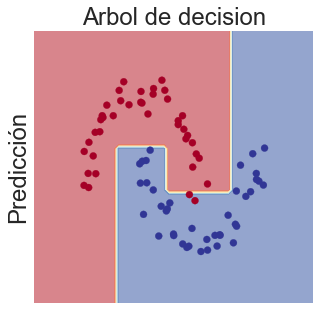

In [13]:
plot_region(dataset_spiral_test[0], dataset_spiral_test[1], dt_clf_spiral, model="Arbol de decision")

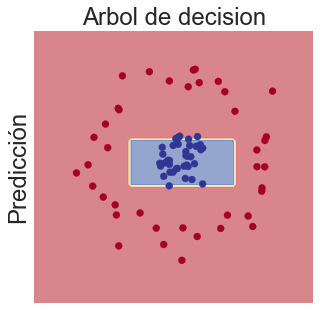

In [14]:
plot_region(dataset_donut_test[0], dataset_donut_test[1], dt_clf_donut, model="Arbol de decision")

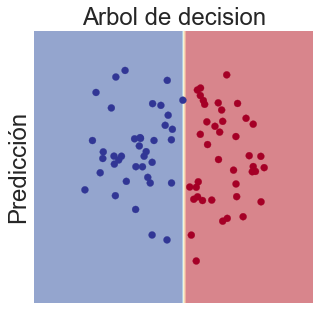

In [15]:
plot_region(dataset_linear_test[0], dataset_linear_test[1], dt_clf_linear, model="Arbol de decision")

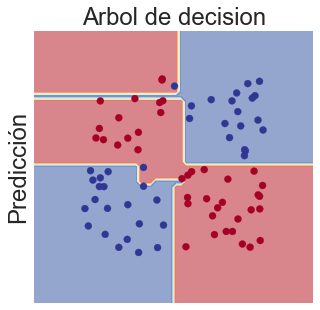

In [16]:
plot_region(dataset_xor_test[0], dataset_xor_test[1], dt_clf_xor, model="Arbol de decision")

# Save Models

In [17]:
pickle.dump(dt_clf_spiral, open("dt_clf_spiral.pickle", "wb"))
pickle.dump(dt_clf_donut, open("dt_clf_donut.pickle", "wb"))
pickle.dump(dt_clf_linear, open("dt_clf_linear.pickle", "wb"))
pickle.dump(dt_clf_xor, open("dt_clf_xor.pickle", "wb"))
pickle.dump([dt_linear_time, dt_spiral_time, dt_donut_time, dt_xor_time], open("dt_times.pickle", "wb"))